Let assume that you are a doctor, you evaluating data for one thousand people and predicting if somebody could get coronavirus based your own ML algorithms. 
We will go step by step to evaluate our algorithm by calculating metrics such as TP, TN, FP, FN, TPR, TNR, PPV, NPV, FPR and ACC. Let us assume that you are familiar with those metrics, or read further here⁴.
There are two things before we try to evaluate your algorithms.
What you predict: coronavirus_input.dat file.
What result you get: coronavirus_output.dat file.

Let's start!
First of all, we create a new Jupiter Notebooks file - "coronavirus.ipynb".
In our example. You predict six people will get coronavirus.

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/inputdat/input.dat
/kaggle/input/outputdat/output.dat


In [4]:
input_file = '/kaggle/input/inputdat/input.dat'

f_input_file = open(input_file, "r")
data_input_file = f_input_file.read().replace('\n', '').split(',')

y_pred = [int(i) for i in data_input_file]

print(y_pred)

[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 

By the end of season, you find only five people had coronavirus.

In [3]:
output_file = '/kaggle/input/outputdat/output.dat'

f_output_file = open(output_file, "r")
data_output_file = f_output_file.read().replace('\n', '').split(',')

y_true = [int(i) for i in data_output_file]
print(y_true)

[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 

Building a confusion matrix.

In [0]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

Disply the confusion matrix.

In [0]:
print('Here is our confusion matrix.')

import pandas as pd
cmtx = pd.DataFrame(
    confusion_matrix(y_true, y_pred, labels=[1, 0]), 
    index=['true:1', 'true:0'], 
    columns=['pred:1', 'pred:0']
)
print(cmtx)

We calculate the percentage of sick people who are correctly identified as having the condition (also called sensitivity).

In [0]:
sensitivity = tp / (tp+fn)
print('The percentage of sick people who are correctly identified as having the condition')
print('Sensitivity : %7.3f %%' % (sensitivity*100),'\n')

We also the percentage of healthy people who are correctly identified as not having the condition (also called specificity).

In [0]:
specificity = tn / (tn+fp)
print('The percentage of healthy people who are correctly identified as not having the condition')
print('Specificity : %7.3f %%' % (specificity*100))

Next, we calculate the precision of this algorithm.

In [0]:
from sklearn.metrics import precision_score
print('The ratio of properly predicted positive clarifications to the total predicted positive clarifications.')
print(precision_score(y_true, y_pred, average=None))

In [0]:
npv = tn / (tn+fn)
print('The probability that records with a negative predicted result truly should be negative: %7.3f %%' % (npv*100))

We calculate the proportion of positives that yield negative prediction outcomes with the specific model (also called miss rate or FNR).

In [0]:
fnr = fp / (fn+tp)
print('The proportion of positives that yield negative prediction outcomes with the specific model: %7.3f %%' % (fnr*100))

Finally, we calculate the false positive rate (also called FPR).

In [0]:
fdr = fp / (fp+tp)
print('False discovery rate: %7.3f %%' % (fdr*100))

We calculate statistical bias, as these cause a difference between a result and a "true" value.

In [0]:
acc = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy: %7.3f %%' % (acc*100))

Finally, we will calculate the ROC metric. Let assume score variable which stores the probability of your prediction as a value of random.

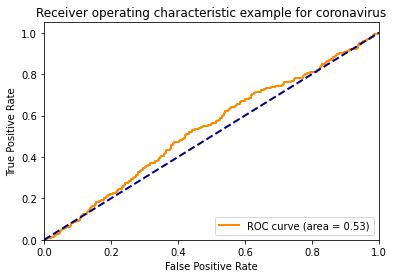

In [21]:
import numpy as np

n0, n1 = 521, 479
score0 = np.random.rand(n0)/2
label0 = np.zeros(n0, dtype = int)
score1  = np.random.rand(n1)/2 + .2
label1 = np.ones(n1, dtype = int)
scores = np.concatenate((score0, score1))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, scores, pos_label = 1)

import matplotlib.pyplot as plt
from itertools import cycle
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example for coronavirus')
plt.legend(loc="lower right")
plt.show()